## Importing main.ipynb 
In order to use prepared datasets of main.ipynb for model fitting, we need to import that..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

<string>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


<string>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<string>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


Percentage of Fraud Tnx in datasets : 0.21%
The number of Classes before the fit Counter({0.0: 170102, 1.0: 360})
The number of Classes after the fit Counter({0.0: 360, 1.0: 360})


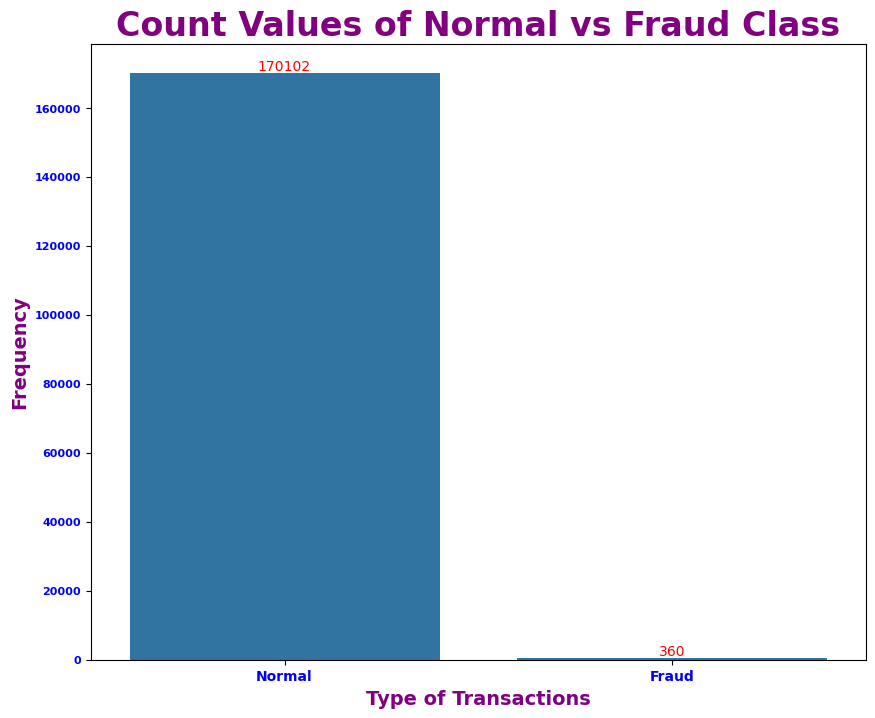

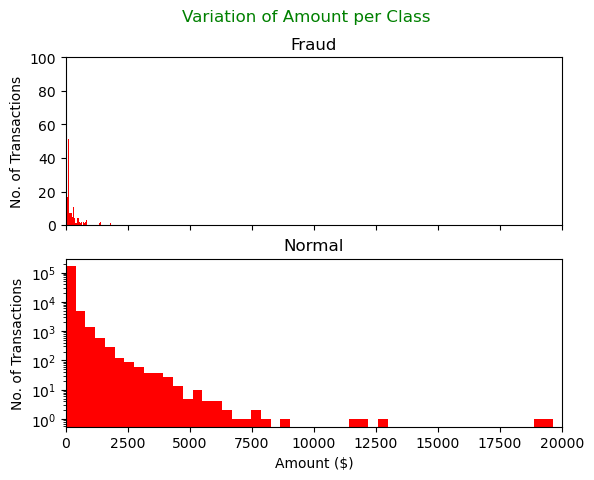

In [2]:
!pip install import-ipynb
import import_ipynb
import main ### Importing main.ipynb notebook here

## Importing necessary libraries..

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Function for model fitting, model evaluation and Visualization.

In [6]:
def XGB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)

    

    print("------------Training data Prediction--------------")
    y_preds = xgb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)
    #visz. 
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")


    

    print("------------Test Prediction--------------")

    y_preds = xgb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)
    #visz.
    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

## XGBClassifier on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
------------Training data Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    136091
         1.0       1.00      1.00      1.00       278

    accuracy                           1.00    136369
   macro avg       1.00      1.00      1.00    136369
weighted avg       1.00      1.00      1.00    136369



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34011
         1.0       0.98      0.77      0.86        82

    accuracy                           1.00     34093
   macro avg       0.99      0.88      0.93     34093
weighted avg       1.00      1.00      1.00     34093



Accuracy Score:

99.941337%



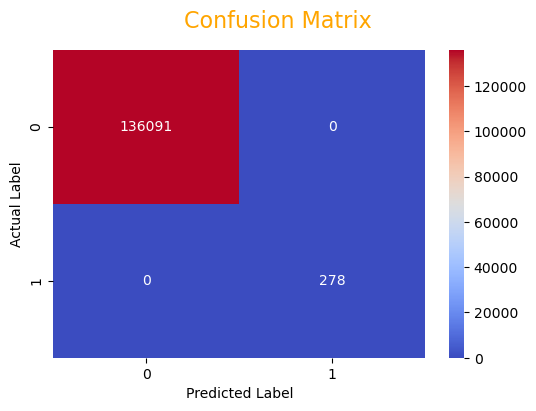

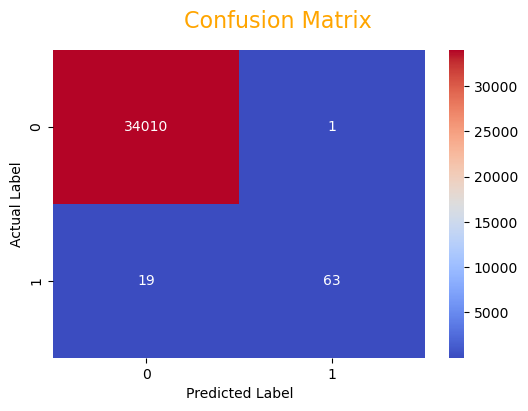

In [8]:
XGB_model(main.X, main.y)

## XGBClassifier on StandardScaled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
------------Training data Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    136091
         1.0       1.00      1.00      1.00       278

    accuracy                           1.00    136369
   macro avg       1.00      1.00      1.00    136369
weighted avg       1.00      1.00      1.00    136369



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34011
         1.0       0.98      0.77      0.86        82

    accuracy                           1.00     34093
   macro avg       0.99      0.88      0.93     34093
weighted avg       1.00      1.00      1.00     34093



Accuracy Score:

99.941337%



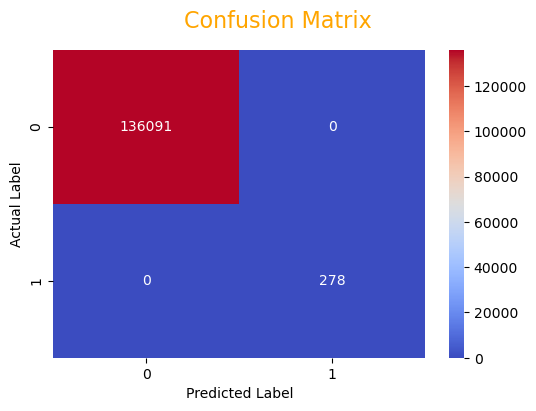

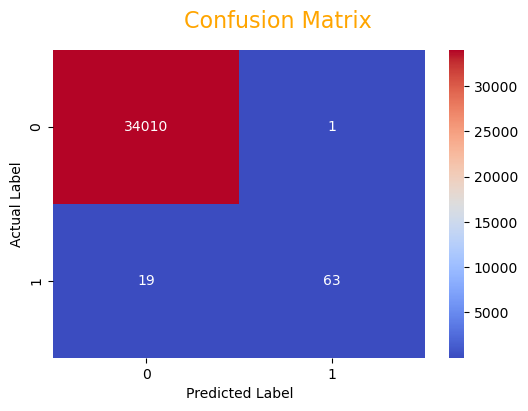

In [10]:
XGB_model(main.X_scaled, main.y_scaled)

## XGBClassifier on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
------------Training data Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       278
         1.0       1.00      1.00      1.00       298

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95        82
         1.0       0.96      0.89      0.92        62

    accuracy                           0.94       144
   macro avg       0.94      0.93      0.94       144
weighted avg       0.94      0.94      0.94       144



Accuracy Score:

93.750000%



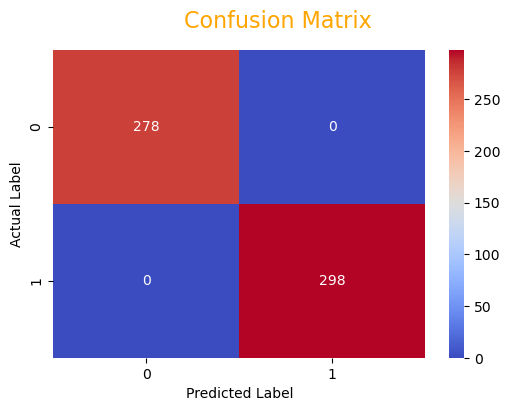

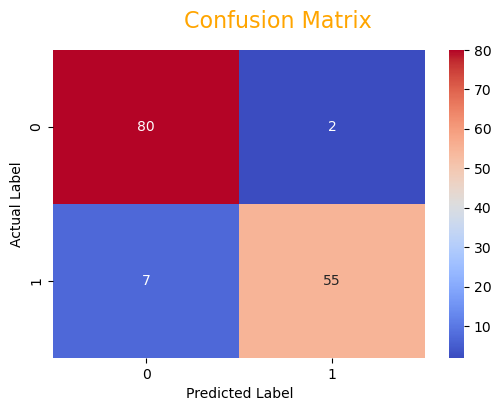

In [12]:
XGB_model(main.X_undersampled, main.y_undersampled)

## XGBClassifier on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
------------Training data Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    136051
         1.0       1.00      1.00      1.00    227482

    accuracy                           1.00    363533
   macro avg       1.00      1.00      1.00    363533
weighted avg       1.00      1.00      1.00    363533



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34051
         1.0       1.00      1.00      1.00     56833

    accuracy                           1.00     90884
   macro avg       1.00      1.00      1.00     90884
weighted avg       1.00      1.00      1.00     90884



Accuracy Score:

99.992298%



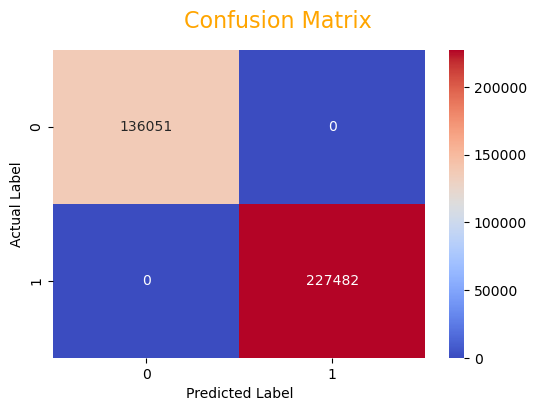

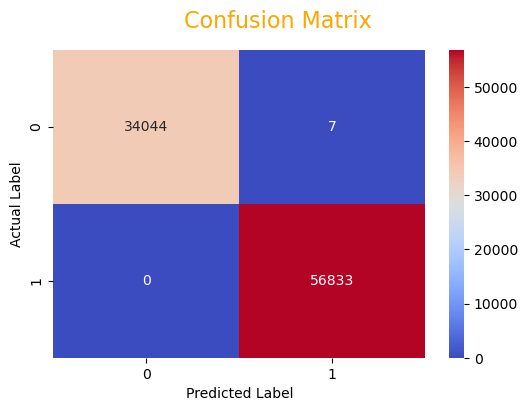

In [14]:
XGB_model(main.X_oversampled, main.y_oversampled)

## XGBClassifier on SMOTE Dataset

In [ ]:
XGB_model(main.X_smote, main.y_smote)

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....


## `CONCLUSION:`


a) Undersampling doesn't work efficiently for Large majority class datasets as it ignores many valuable tuples. But, can be efficient for small majority class datasets

b) It works even efficiently for this imbalanced datasets.

c) It takes around 1 minute for training.

d) Maximum `Accuracy` of `99.993845% `and `macro-average of F1-Score` of `1.00` acheived with `Oversampling` technique.